#**Random Forest on the rice dataset**


**Import the usual libraries for pandas and plotting**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stop showing future warning errors
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Checking info(), head(), describe(), keys(), shape**



In [5]:
rice_df=pd.read_csv("/content/drive/MyDrive/Thesis/Updates/Dataset/Copy of Year_wise.csv")
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Element             59 non-null     int64  
 1   Aman_Rice           59 non-null     float64
 2   AUS_Rice            59 non-null     float64
 3   Boro_Rice           59 non-null     float64
 4   Gross_Area          59 non-null     float64
 5   Aman_Production     59 non-null     float64
 6   AUS_Production      59 non-null     float64
 7   Boro_Production     59 non-null     float64
 8   Total_Production    59 non-null     float64
 9   Average_Yeild_Rate  59 non-null     float64
 10  Temperature         59 non-null     float64
 11  Rainfall            59 non-null     float64
 12  Target              59 non-null     int64  
dtypes: float64(11), int64(2)
memory usage: 6.1 KB


In [6]:
rice_df.describe()

,Element,Aman_Rice,AUS_Rice,Boro_Rice,Gross_Area,Aman_Production,AUS_Production,Boro_Production,Total_Production,Average_Yeild_Rate,Temperature,Rainfall,Target
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1990.000000,51.242542,20.651864,21.883898,103.282542,82.415085,23.845424,66.580339,209.595763,1.980475,25.415254,191.057627,0.372881
std,17.175564,15.979401,10.881237,15.467206,7.368179,31.771930,11.081258,61.715534,98.175834,0.790182,0.350351,23.404344,0.487722
min,1961.000000,0.000000,0.000000,0.000000,84.800000,0.000000,0.000000,0.000000,97.760000,1.031000,24.680000,143.150000,0.000000
25%,1975.500000,53.755000,11.255000,9.105000,99.005000,72.305000,17.995000,17.190000,135.990000,1.372000,25.160000,177.485000,0.000000
50%,1990.000000,56.460000,21.110000,15.750000,103.140000,85.390000,23.280000,39.040000,176.870000,1.711000,25.400000,189.570000,0.000000
75%,2004.500000,57.560000,31.100000,37.070000,106.840000,98.120000,31.265000,113.965000,263.600000,2.473000,25.615000,211.775000,1.000000
max,2019.000000,60.530000,35.060000,48.400000,116.150000,131.900000,46.680000,191.920000,445.330000,3.866000,26.430000,243.750000,1.000000


**Setting up the data**

In [18]:
rice_df.keys()

Index(['Element', 'Aman_Rice', 'AUS_Rice', 'Boro_Rice', 'Gross_Area',
       'Aman_Production', 'AUS_Production', 'Boro_Production',
       'Total_Production', 'Average_Yeild_Rate', 'Temperature', 'Rainfall',
       'Target '],
      dtype='object')

In [19]:
rice_df['Element'] = pd.to_numeric(rice_df['Element'],errors = 'coerce')
rice_df['Aman_Rice'] = pd.to_numeric(rice_df['Aman_Rice'],errors = 'coerce')
rice_df['AUS_Rice'] = pd.to_numeric(rice_df['AUS_Rice'],errors = 'coerce')
rice_df['Boro_Rice'] = pd.to_numeric(rice_df['Boro_Rice'],errors = 'coerce')
rice_df['Gross_Area'] = pd.to_numeric(rice_df['Gross_Area'],errors = 'coerce')
rice_df['Aman_Production'] = pd.to_numeric(rice_df['Aman_Production'],errors = 'coerce')
rice_df['AUS_Production'] = pd.to_numeric(rice_df['AUS_Production'],errors = 'coerce')
rice_df['Boro_Production'] = pd.to_numeric(rice_df['Boro_Production'],errors = 'coerce')
rice_df['Total_Production'] = pd.to_numeric(rice_df['Total_Production'],errors = 'coerce')
rice_df['Average_Yeild_Rate'] = pd.to_numeric(rice_df['Average_Yeild_Rate'],errors = 'coerce')
rice_df['Temperature'] = pd.to_numeric(rice_df['Temperature'],errors = 'coerce')
rice_df['Rainfall'] = pd.to_numeric(rice_df['Rainfall'],errors = 'coerce')

In [20]:
rice_df.head()

,Element,Aman_Rice,AUS_Rice,Boro_Rice,Gross_Area,Aman_Production,AUS_Production,Boro_Production,Total_Production,Average_Yeild_Rate,Temperature,Rainfall,Target
0,1961,48.34,28.80,7.66,84.8,78.54,37.40,14.97,130.91,1.540,25.18,211.68,0
1,1962,49.53,29.50,7.87,86.9,72.44,34.49,12.59,120.73,1.390,25.16,179.08,0
2,1963,51.36,30.60,8.14,90.1,86.76,41.31,16.53,144.60,1.600,25.28,189.57,0
3,1964,52.60,31.38,8.32,92.3,85.77,40.84,14.91,142.95,1.550,25.44,209.28,0
4,1965,53.35,31.82,8.43,93.6,85.75,40.83,14.90,142.92,1.526,25.16,198.27,0


In [22]:
rice_df.shape

(59, 13)

**Train test split**

In [24]:
X = rice_df.iloc[:, 0:-1].values
y = rice_df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print('Shape of X train = ', X_train.shape)
print('Shape of y train = ', y_train.shape)
print('Shape of X test = ', X_test.shape)
print('Shape of y test = ', y_test.shape)

Shape of X train =  (41, 12)
Shape of y train =  (41,)
Shape of X test =  (18, 12)
Shape of y test =  (18,)


**Training a decision tree model**

In [26]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [27]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Predictions and Evaluation of Decision Tree**

> Create predictions from the test set and create a classification report and a confusion matrix



In [28]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [29]:
cm = confusion_matrix(y_test, predictions)
print(cm)
print("Accuracy of the prediction: ", round((cm[0,0]+cm[1,1])/cm.sum(),3))


[[13  0]
 [ 0  5]]
Accuracy of the prediction:  1.0


**Training the Random Forest model**
---
Creating an instance of the RandomForestClassifier class and fit it to the training data from the previous step.



In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Prediction and evaluation**
---
Predict off the y_test values and evaluating the test model

In [31]:
rfc_pred = rfc.predict(X_test)
# Classification report
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Confusion matrix of the prediction

In [32]:
cm = confusion_matrix(y_test, rfc_pred)
print(cm)

[[13  0]
 [ 0  5]]


**Running a loop with increasing number of trees in the random forest and checking accuracy of confusion matrix**
---
Criterion 'gini' or 'entropy'

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

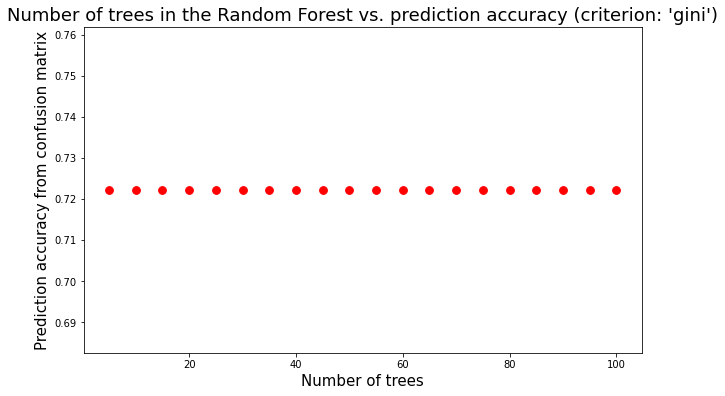

In [42]:
nsimu = 21
accuracy = [0]*nsimu
ntree = [0]*nsimu

for i in range(1,nsimu):
  rfc = RandomForestClassifier(n_estimators=i*5,min_impurity_split=10,max_depth=None,criterion='gini')
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  cm = confusion_matrix(y_test,rfc_pred)
  accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
  ntree[i] = i*5

plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)




Text(0, 0.5, 'Prediction accuracy from confusion matrix')

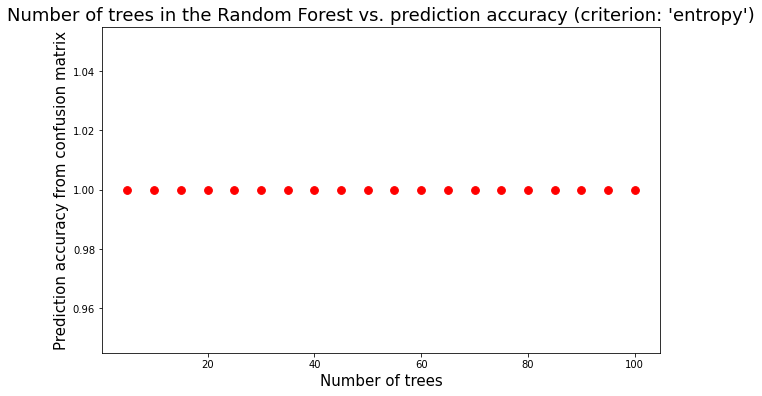

In [36]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

Fixing max tree depth

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

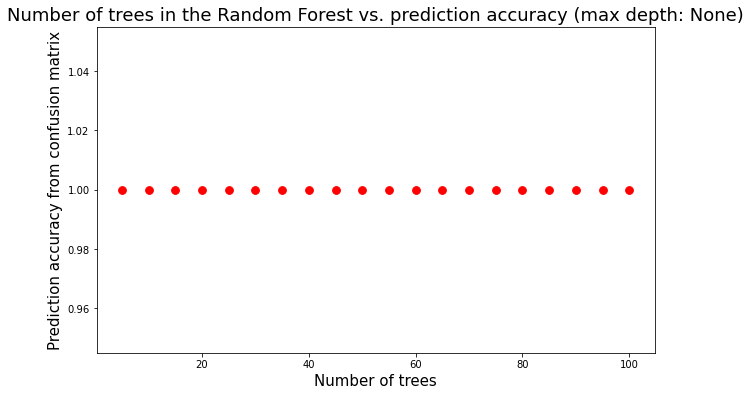

In [37]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

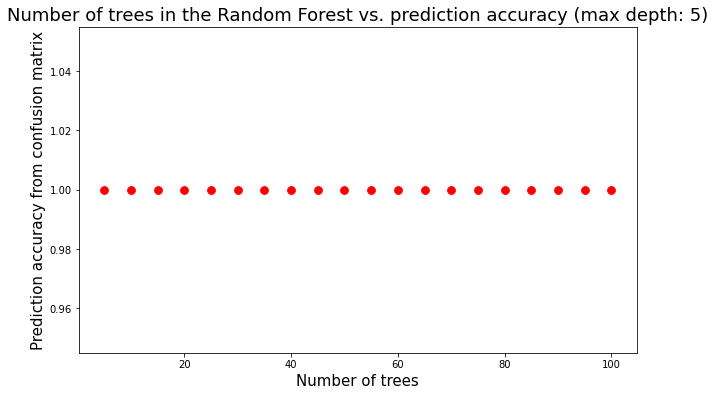

In [38]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

Minimum sample split criteria

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

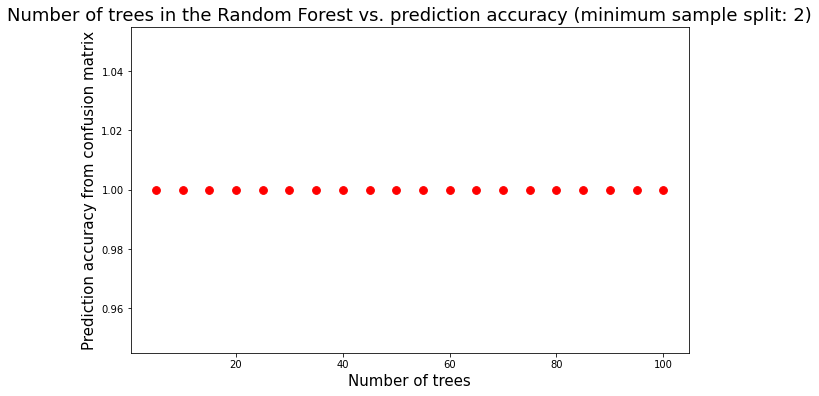

In [39]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

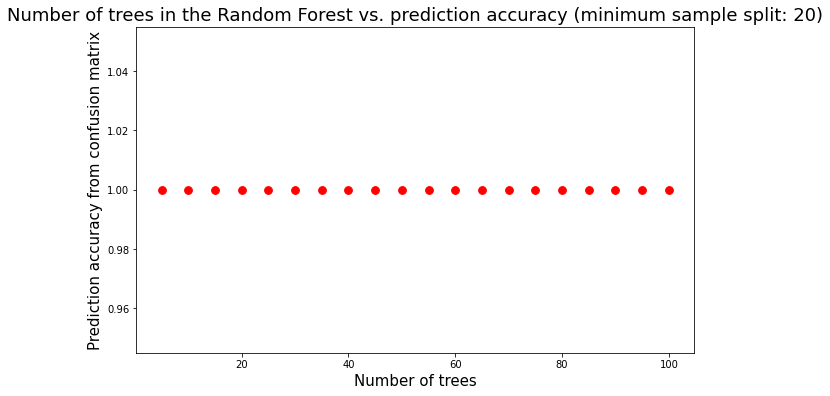

In [40]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)